# Machine Learning - Classificação por trás dos panos

### 1 - Importandos biblitotecas e base de dados

#### 1.1 Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Pre-precessamento
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

# Validação dos modelos
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#### 1.2 Base de Dados

In [2]:
df_original = pd.read_csv('https://gist.githubusercontent.com/luizmoraess/6fc682be67a1c376872f697a0eb06d3b/raw/63acb07032d70235802f553f9ebabe7997510f65/customer-churn.csv')
df_original.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


### 2 - Pre-Processamento

#### 2.1 - Converter "Sim" e "Nao" para 1 e 0

In [3]:
df_original.columns

Index(['Maior65Anos', 'Conjuge', 'Dependentes', 'MesesDeContrato',
       'TelefoneFixo', 'VariasLinhasTelefonicas', 'ServicoDeInternet',
       'SegurancaOnline', 'BackupOnline', 'SeguroNoDispositivo',
       'SuporteTecnico', 'TVaCabo', 'StreamingDeFilmes', 'TipoDeContrato',
       'PagamentoOnline', 'FormaDePagamento', 'ContaMensal', 'Churn'],
      dtype='object')

In [4]:
colunas_a_transformar = ['Conjuge', 'Dependentes','TelefoneFixo','SegurancaOnline', 'BackupOnline', 'SeguroNoDispositivo','SuporteTecnico', 'TVaCabo', 'StreamingDeFilmes','PagamentoOnline','Churn']

In [5]:
transformacao_dic = {
    "Sim": 1,
    "Nao": 0
}

df_original[colunas_a_transformar] = df_original[colunas_a_transformar].replace(transformacao_dic)
df_original.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,1,0,1,0,SemServicoTelefonico,DSL,0,1,0,0,0,0,Mensalmente,1,ChequeDigital,29.85,0
1,0,0,0,34,1,Nao,DSL,1,0,1,0,0,0,UmAno,0,ChequePapel,56.95,0
2,0,0,0,2,1,Nao,DSL,1,1,0,0,0,0,Mensalmente,1,ChequePapel,53.85,1
3,0,0,0,45,0,SemServicoTelefonico,DSL,1,0,1,1,0,0,UmAno,0,DebitoEmConta,42.30,0
4,0,0,0,2,1,Nao,FibraOptica,0,0,0,0,0,0,Mensalmente,1,ChequeDigital,70.70,1


#### 2.2 - Transformar variaveis descritivas em binarios, através do `pd.get_dummies`

In [6]:
df = pd.get_dummies(df_original, dtype=int)
df.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,Churn,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_0,StreamingDeFilmes_1,StreamingDeFilmes_SemServicoDeInternet,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,1,29.85,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56.95,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,1,53.85,1,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,0,42.30,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,1,70.70,1,1,0,...,1,0,0,0,1,0,0,1,0,0


Alterando configução default do pandas, para exibir todas as colunas do dataframe

In [7]:
pd.set_option('display.max_columns',len(df.columns))
df.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,Churn,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_0,SegurancaOnline_1,SegurancaOnline_SemServicoDeInternet,BackupOnline_0,BackupOnline_1,BackupOnline_SemServicoDeInternet,SeguroNoDispositivo_0,SeguroNoDispositivo_1,SeguroNoDispositivo_SemServicoDeInternet,SuporteTecnico_0,SuporteTecnico_1,SuporteTecnico_SemServicoDeInternet,TVaCabo_0,TVaCabo_1,TVaCabo_SemServicoDeInternet,StreamingDeFilmes_0,StreamingDeFilmes_1,StreamingDeFilmes_SemServicoDeInternet,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,1,29.85,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56.95,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,1,53.85,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,0,42.30,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,1,70.70,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


#### 2.3 - Balanceamento dos dados

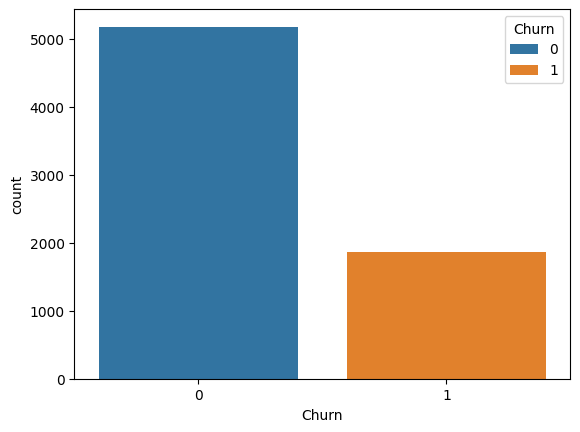

In [8]:
ax = sns.countplot(data=df, x='Churn', hue='Churn')

Separando os dados em 2 partes (x: features e y: variável target)

In [9]:
x = df.drop('Churn', axis=1)
y = df['Churn']

Trantado o desbalanceamento dos dados com a classe `SMOTE` da biblioteca *imblearn* através da tecnica *over_sampliling*

In [10]:
smt = SMOTE(random_state=123)
x, y = smt.fit_resample(x, y) # Realiza a reamostragem do conjunto de dados

In [11]:
df_balanceado = pd.concat([x, y], axis=1) # junção das features (x) com a variavel target (y) após aplicação do balanceamento

df_balanceado.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_0,SegurancaOnline_1,SegurancaOnline_SemServicoDeInternet,BackupOnline_0,BackupOnline_1,BackupOnline_SemServicoDeInternet,SeguroNoDispositivo_0,SeguroNoDispositivo_1,SeguroNoDispositivo_SemServicoDeInternet,SuporteTecnico_0,SuporteTecnico_1,SuporteTecnico_SemServicoDeInternet,TVaCabo_0,TVaCabo_1,TVaCabo_SemServicoDeInternet,StreamingDeFilmes_0,StreamingDeFilmes_1,StreamingDeFilmes_SemServicoDeInternet,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,0,1,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,0,34,1,0,56.95,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,0,2,1,1,53.85,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,0,0,45,0,0,42.30,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,0,0,2,1,1,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


Plotando a variavel target balanceada

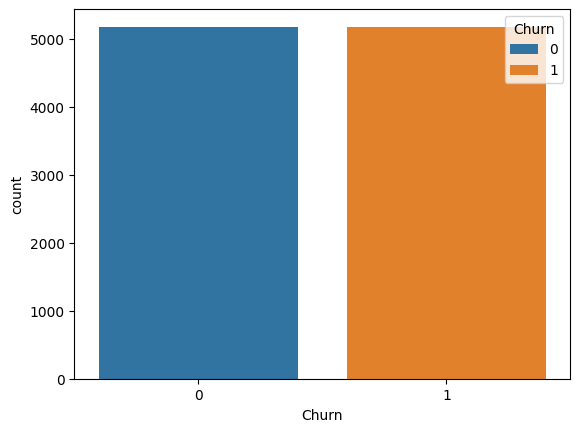

In [12]:
ax = sns.countplot(data=df_balanceado, x='Churn', hue='Churn')

#### 2.4 - Normalização dos dados - alterando a escala

In [13]:
x = df_balanceado.drop('Churn', axis=1)
y = df_balanceado['Churn']

In [14]:
norm = StandardScaler()
x_normalizado = norm.fit_transform(x)
x_normalizado

array([[-0.41350409,  1.26542767, -0.52756038, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.41350409, -0.79024667, -0.52756038, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [-0.41350409, -0.79024667, -0.52756038, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       ...,
       [-0.41350409, -0.79024667, -0.52756038, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.41350409, -0.79024667, -0.52756038, ..., -0.76750657,
        -0.47882211, -0.4360152 ],
       [-0.41350409, -0.79024667, -0.52756038, ..., -0.76750657,
        -0.47882211, -0.4360152 ]])

## Modelos de Classificação

#### Separando o dataframe em amostras de treino e teste

In [15]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, test_size=0.3, random_state=123)

### 3 - Modelo `KNN` (k nearest neighbor)

#### 3.1 - Instanciando o KNN e criando o modelo

In [16]:
knn = KNeighborsClassifier(metric='euclidean')

knn.fit(x_treino, y_treino)

predicao_knn = knn.predict(x_teste)

acuracia_knn = accuracy_score(y_teste, predicao_knn)
print(f'Acuracia: {acuracia_knn:.2%}')

Acuracia: 81.35%


### 4 - Modelo Bernoulli Naive Bayes

#### 4.1 - Instanciando o Naive Bayes e criando o modelo

In [17]:
bnb = BernoulliNB()

bnb.fit(x_treino, y_treino)

predicao_bnb = bnb.predict(x_teste)

acuracia_bnb = accuracy_score(y_teste, predicao_bnb)
print(f'Acuracia: {acuracia_bnb:.2%}')

Acuracia: 76.84%


### 5 - Modelo Decision Tree Classifier

#### 5.1 - Instanciando o Decision Tree e criando o modelo

5.1.1 - Utitlizando o criterio `entropy`

In [18]:
dct_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

dct_entropy.fit(x_treino, y_treino)

predicao_dct_entropy = dct_entropy.predict(x_teste)

acuracia_dct_entropy = accuracy_score(y_teste, predicao_dct_entropy)
print(f'Acuracia: {acuracia_dct_entropy:.2%}')

Acuracia: 80.84%


5.1.2 Utilizando o criterio `gini`

In [19]:
dct_gini = DecisionTreeClassifier(criterion='gini', random_state=41,  max_depth=10)

dct_gini.fit(x_treino, y_treino)

predicao_dct_gini = dct_gini.predict(x_teste)

acuracia_dct_gini = accuracy_score(y_teste, predicao_dct_gini)
print(f'Acuracia: {acuracia_dct_gini:.2%}')

Acuracia: 82.09%


## Validação dos Modelos

### Confusion Matrix

In [20]:
print(f'KNN: Matriz de Confusão{np.reshape(confusion_matrix(y_teste, predicao_knn),(1,4))}\n')
print(f'BNB: Matriz de Confusão{np.reshape(confusion_matrix(y_teste, predicao_bnb),(1,4))}\n')
print(f'DCT_Entropy: Matriz de Confusão{np.reshape(confusion_matrix(y_teste, predicao_dct_entropy),(1,4))}\n')
print(f'DCT_Gini: Matriz de Confusão{np.reshape(confusion_matrix(y_teste, predicao_dct_gini),(1,4))}')

KNN: Matriz de Confusão[[1241  328  251 1285]]

BNB: Matriz de Confusão[[1091  478  241 1295]]

DCT_Entropy: Matriz de Confusão[[1255  314  281 1255]]

DCT_Gini: Matriz de Confusão[[1214  355  201 1335]]


In [21]:
df_matrix_knn = pd.DataFrame(np.reshape(confusion_matrix(y_teste, predicao_knn),(1,4)))
df_matrix_bnb = pd.DataFrame(np.reshape(confusion_matrix(y_teste, predicao_bnb),(1,4)))
df_matrix_dct_entropy = pd.DataFrame(np.reshape(confusion_matrix(y_teste, predicao_dct_entropy),(1,4)))
df_matrix_dct_gini = pd.DataFrame(np.reshape(confusion_matrix(y_teste, predicao_dct_gini),(1,4)))        

In [22]:
colunas = ['True Positive','False Negative','False Positive','True Negative']
indice = ['KNN','BNB','DCT_entropy', 'DCT_gini']
df = pd.concat([df_matrix_knn,df_matrix_bnb,df_matrix_dct_entropy,df_matrix_dct_gini])
df.columns = colunas
df.index = indice
df.style.highlight_max(color='green')

,True Positive,False Negative,False Positive,True Negative
KNN,1241,328,251,1285
BNB,1091,478,241,1295
DCT_entropy,1255,314,281,1255
DCT_gini,1214,355,201,1335


### Accuracy Score

In [23]:
acuracia_knn = accuracy_score(y_teste, predicao_knn)
acuracia_bnb = accuracy_score(y_teste, predicao_bnb)
acuracia_dct_entropy = accuracy_score(y_teste, predicao_dct_entropy)
acuracia_dct_gini = accuracy_score(y_teste, predicao_dct_gini)

print(f'Acuracia KNN: {acuracia_knn:.2%}')
print(f'Acuracia BNB: {acuracia_bnb:.2%}')
print(f'Acuracia DCT_entropy: {acuracia_dct_entropy:.2%}')
print(f'Acuracia DCT_gini: {acuracia_dct_gini:.2%}')

Acuracia KNN: 81.35%
Acuracia BNB: 76.84%
Acuracia DCT_entropy: 80.84%
Acuracia DCT_gini: 82.09%


### Precision Score

In [24]:
precisao_knn = precision_score(y_teste, predicao_knn)
precisao_bnb = precision_score(y_teste, predicao_bnb)
precisao_dct_entropy = precision_score(y_teste, predicao_dct_entropy)
precisao_dct_gini = precision_score(y_teste, predicao_dct_gini)

print(f'precisao KNN: {precisao_knn:.2%}')
print(f'precisao BNB: {precisao_bnb:.2%}')
print(f'precisao DCT_entropy: {precisao_dct_entropy:.2%}')
print(f'precisao DCT_gini: {precisao_dct_gini:.2%}')

precisao KNN: 79.67%
precisao BNB: 73.04%
precisao DCT_entropy: 79.99%
precisao DCT_gini: 78.99%


### Recall Score

In [25]:
recall_knn = recall_score(y_teste, predicao_knn)
recall_bnb = recall_score(y_teste, predicao_bnb)
recall_dct_entropy = recall_score(y_teste, predicao_dct_entropy)
recall_dct_gini = recall_score(y_teste, predicao_dct_gini)

print(f'recall KNN: {recall_knn:.2%}')
print(f'recall BNB: {recall_bnb:.2%}')
print(f'recall DCT_entropy: {recall_dct_entropy:.2%}')
print(f'recall DCT_gini: {recall_dct_gini:.2%}')

recall KNN: 83.66%
recall BNB: 84.31%
recall DCT_entropy: 81.71%
recall DCT_gini: 86.91%


### F1 Score

In [26]:
f1_knn = f1_score(y_teste, predicao_knn)
f1_bnb = f1_score(y_teste, predicao_bnb)
f1_dct_entropy = f1_score(y_teste, predicao_dct_entropy)
f1_dct_gini = f1_score(y_teste, predicao_dct_gini)

print(f'f1 KNN: {f1_knn:.2%}')
print(f'f1 BNB: {f1_bnb:.2%}')
print(f'f1 DCT_entropy: {f1_dct_entropy:.2%}')
print(f'f1 DCT_gini: {f1_dct_gini:.2%}')

f1 KNN: 81.61%
f1 BNB: 78.27%
f1 DCT_entropy: 80.84%
f1 DCT_gini: 82.77%


## Conclusão

### Selecionando o modelo

De acordo com as metricas apresentadas acima para validação dos modelos, nota-se que o modelo de Arvore de Decisão (Decision Tree Classifier) com o criterio gini, obteve o melhor desempenho na matriz de confusão, acuracia, recall e F1 Score. Portanto, iremos seguir com este modelo para realizar as previsões de Churn com novos clientes